导入需要的包。

In [2]:
import random
import torch
import matplotlib.pyplot as plt

使用 `torch.normal` 方法随机生成一个服从正态分布的数列，第一个参数是期望值，第二个参数是方差，第三个参数是一个元组，表示生成矩阵的形状。

In [3]:
def synthetic_data(w, b, m, n):
    """
    生成 Y=wX+b+noise 
    
    :param w: weight vector 
    :param b: bias scalar
    :param m: number of samples
    :param n: number of features
    :return: Y, labels value vector
    """
    # 生成一个期望值为0，方差为1，m*n的input features
    X = torch.normal(0, 1, (m, n))
    Y = X @ w.reshape(n, 1) + b
    
    # 噪声
    Y += torch.normal(0, 0.1, (m, 1))
    
    return X, Y.reshape(-1, 1)

w = torch.tensor([2, -3.4])
b = 4.2
features, labels = synthetic_data(w, b, 200, len(w))

print(features)
print(labels)

tensor([[-1.4325e-01,  7.6715e-01],
        [ 1.1289e+00, -3.2089e-01],
        [ 2.7929e-01,  8.6861e-02],
        [ 8.6804e-02, -5.3009e-01],
        [-1.0500e+00,  1.1065e-01],
        [-5.9197e-01,  1.2339e+00],
        [ 1.0351e-01, -6.6942e-01],
        [-8.3329e-01,  4.9117e-01],
        [-5.1728e-01,  1.1937e+00],
        [ 1.7160e-01,  9.8829e-01],
        [ 1.2195e+00,  1.3735e+00],
        [-1.1683e-02,  8.4451e-01],
        [ 4.5999e-01, -3.6120e-01],
        [-5.7695e-02, -2.5998e+00],
        [-7.4112e-01,  2.7436e-01],
        [ 5.5759e-01, -1.0851e+00],
        [-2.8317e-01, -7.0625e-02],
        [-8.3479e-01,  3.6244e-01],
        [ 9.8445e-01, -5.0542e-01],
        [ 1.0315e+00,  1.0800e+00],
        [-3.0461e-01, -2.2026e+00],
        [-4.0905e-01,  4.6128e-01],
        [-2.6060e-01,  8.9661e-01],
        [-4.8776e-01,  1.1190e-02],
        [-1.0055e+00,  7.8912e-01],
        [ 1.4179e-01,  3.4889e-02],
        [ 1.3263e+00,  1.3716e+00],
        [ 3.6043e-01, -3.534

得到的features, labels就是人造数据集的输入特征和标签。我们可以画出输入特征的散点图。

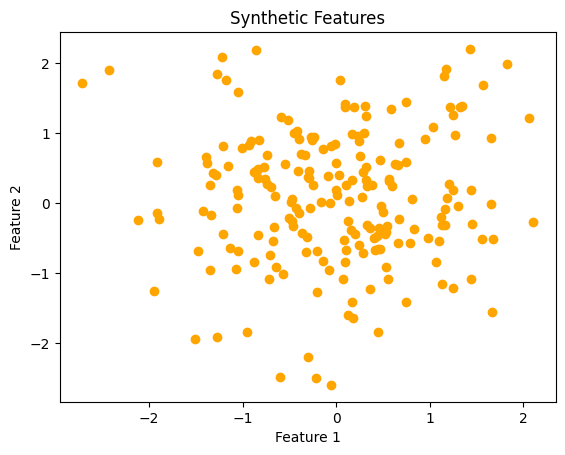

In [4]:
plt.figure()

plt.scatter(features[:, 0], features[:, 1], color='orange')

plt.title('Synthetic Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

定义一个data_iter函数，该函数的作用是返回一个批量大小的特征和标签。当数据集非常大的时候，我们不需要在整个数据集上进行训练，因为时间成本很大，我们只需要在小批量的范围内随机选取样本进行训练也可以达到不错的效果。

In [5]:
def data_iter(batch_size, features, labels):
    indices = [i for i in range(len(features))]
    # shuffle函数用于随机打乱一个数组，直接做用于数组本身
    random.shuffle(indices)
    
    for i in range(0, len(indices), batch_size):
        yield features[i : min(i + batch_size, len(features))], labels[i : min(i + batch_size, len(features))]